<a href="https://colab.research.google.com/github/Lucarvalho123/Pocoes_Catalogacao/blob/main/PNAB_Pocoes_Catalogacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJETO PNAB - POÇÕES/BA: MEMÓRIA E HISTÓRIA CULTURAL
Núcleo de Catalogação e Arquitetura de Dados
Responsável Técnica: Lu Carvalho

Objetivo: Sistematizar o levantamento histórico de cinemas, coletivos, eventos e grupos culturais da cidade de Poções - BA, utilizando padrões internacionais de metadados para preservação digital.

Metodologia de Dados:
Padronização: Utilização do esquema Dublin Core para garantir que os dados sejam interoperáveis.

Tecnologia: Uso de Python e Biblioteca Pandas para tratamento, limpeza e exportação dos dados.

Acessibilidade: Estruturação para futura integração com sistemas de busca e mapas culturais.

In [1]:
import pandas as pd

# Definindo a estrutura da base de dados cultural
def criar_base_vazia():
    colunas = [
        'ID_ITEM',
        'CATEGORIA',          # Ex: Cinema, Reisado, Coletivo Hip Hop
        'NOME_DO_BEM',
        'ENDERECO_LOCAL',
        'COORDENADAS',        # Importante para o mapa cultural
        'PERIODO_ATIVIDADE',  # Ex: 1970-Ativo ou 1960-1985
        'DESCRICAO_RESUMIDA',
        'FONTE_DADO',         # Ex: Entrevista com Sr. Fulano / Livro tal
        'STATUS_PATRIMONIO'   # Ex: Ativo, Extinto, Em risco
    ]
    return pd.DataFrame(columns=colunas)

# Inicializando a base
df_pocoes = criar_base_vazia()

# Exemplo de como cadastrar um item (vamos cadastrar um agora para teste)
novo_item = {
    'ID_ITEM': 'POC-001',
    'CATEGORIA': 'Cinema',
    'NOME_DO_BEM': 'Cine Alvorada',
    'ENDERECO_LOCAL': 'Praça Coronel Raimundo Pereira, Centro',
    'COORDENADAS': '-14.5292, -40.3631',
    'PERIODO_ATIVIDADE': '1960-1985',
    'DESCRICAO_RESUMIDA': 'Antigo cinema de rua, marco da sociabilidade local nas décadas de 60 e 70.',
    'FONTE_DADO': 'Arquivo Público Municipal / Memória Oral',
    'STATUS_PATRIMONIO': 'Extinto (Prédio descaracterizado)'
}

# Adicionando o item à base
df_pocoes = pd.concat([df_pocoes, pd.DataFrame([novo_item])], ignore_index=True)

# Exibindo o progresso da catalogação
print("--- Sistema de Catalogação PNAB Poções Inicializado ---")
df_pocoes.head()

--- Sistema de Catalogação PNAB Poções Inicializado ---


,ID_ITEM,CATEGORIA,NOME_DO_BEM,ENDERECO_LOCAL,COORDENADAS,PERIODO_ATIVIDADE,DESCRICAO_RESUMIDA,FONTE_DADO,STATUS_PATRIMONIO
0,POC-001,Cinema,Cine Alvorada,"Praça Coronel Raimundo Pereira, Centro","-14.5292, -40.3631",1960-1985,"Antigo cinema de rua, marco da sociabilidade l...",Arquivo Público Municipal / Memória Oral,Extinto (Prédio descaracterizado)


In [2]:
# Função para exportar os dados para diferentes formatos
def exportar_dados(df):
    # Salva em Excel (XLSX) para a prefeitura abrir fácil
    df.to_excel("catalogacao_pocoes.xlsx", index=False)
    # Salva em JSON para desenvolvedores usarem em sites/apps
    df.to_json("catalogacao_pocoes.json", orient="records", indent=4)
    print("Arquivos gerados com sucesso: catalogacao_pocoes.xlsx e .json")

# Executando a exportação
exportar_dados(df_pocoes)

Arquivos gerados com sucesso: catalogacao_pocoes.xlsx e .json


Taxonomia do Projeto
Para garantir o rigor técnico, utilizaremos as seguintes categorias fixas:

PATRIMÔNIO EDIFICADO: Cinemas antigos, coretos, teatros, sedes de coletivos.

PATRIMÔNIO IMATERIAL: Grupos de Reisado, Ternos de Reis, Capoeira.

EVENTOS HISTÓRICOS: Festas de Largo, Micaretas antigas, Festivais de Música.

COLETIVOS CULTURAIS: Grupos de Hip Hop, Trupes de Teatro, Associações.

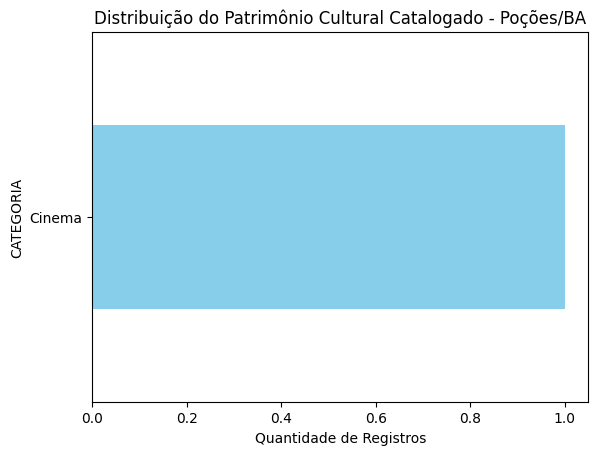

In [3]:
import matplotlib.pyplot as plt

def gerar_grafico(df):
    if not df.empty:
        df['CATEGORIA'].value_counts().plot(kind='barh', color='skyblue')
        plt.title('Distribuição do Patrimônio Cultural Catalogado - Poções/BA')
        plt.xlabel('Quantidade de Registros')
        plt.show()
    else:
        print("Base de dados vazia para gerar gráfico.")

# Chamando a visualização
gerar_grafico(df_pocoes)

In [4]:
def validar_dados(df):
    campos_obrigatorios = ['ID_ITEM', 'CATEGORIA', 'NOME_DO_BEM']
    for campo in campos_obrigatorios:
        if df[campo].isnull().any():
            print(f"ATENÇÃO: Existem itens sem {campo} preenchido!")
        else:
            print(f"Campo {campo} validado com sucesso.")

validar_dados(df_pocoes)

Campo ID_ITEM validado com sucesso.
Campo CATEGORIA validado com sucesso.
Campo NOME_DO_BEM validado com sucesso.


In [5]:
import folium

# Criando um mapa centralizado em Poções/BA
mapa_pocoes = folium.Map(location=[-14.5292, -40.3631], zoom_start=15)

# Adicionando o Cine Alvorada (que cadastramos antes) como exemplo
folium.Marker(
    [-14.5292, -40.3631],
    popup="Cine Alvorada - Patrimônio Histórico",
    tooltip="Clique para ver"
).add_to(mapa_pocoes)

mapa_pocoes